# Identifying features that make high or low quality wine
Identifying the features that correlation with red, and separately, white, wine quality

# Overview
This model will identify the features that can predict wine quality

## When?
This contains a linear regression model that will identify the leading features, and how much influence they have, on the quality of high and low quality wine. Because the qualities of red and white wine are different, there will be two models: one for red, and one for white

The metric that was determined how successful this model is is the R-squared value, from the OLS model.
## Why?
This project is interesting because quality wine can be a highly subjective measurement. If objective, quantitative measurements can be correlated with how the quality will be received, improvements can be made in wine production, marketing, and pricing.

## Who?
This project can be interesting to consumers, producers, and distributors of wine. 
    Consumers can use this model to research wine that may of high quality, or have similar metrics to other wines they enjoy. 
    Producers can use this model to change production practices to achieve different wine properties in order to have a more successful product. 
    Distributors can use this model to identifiy different price points and market certain wine accordingly.

## Background and Research

I didn't look for any other analysis on this dataset, but I'm sure it's been analyzed a lot in academic settings, as it's an easy-find, clean data set on UCI.
# Get the data
## Who?

This is the data source:
Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009
## When?

The data was collected in 2009.

## What?

The data is in two separate files, one for red, and one for white. They have the same features, including the dependent variable, quality. The 11 independent variables are:
    fixed acidity
    volatile acidity
    citric acid
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol
    
The white wine dataset has 1599 instances with the 12 features (1599, 12).
The red wine dataset is has 4898 instances with the 12 features (4898, 12).

There were no missing values. All of the data is type float64, with the exception of 'quality', which is int64.

In the description of the data, it states that there is additional data that was not included, such as grape and location, for proproietary reasons. Having this data would have made this analysis even more interesting.
## Links

The data can be found at UCI:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Citation Request:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Connect

This a supervised learning problem, and the target column is 'quality'. We will explore which features contribute to high and low quality wine.
We will start by using all of the features, and will elimintate them with RFE (Recursive Feature Engineering) by selecting low p-value features, iteratively.

# Explore the Data
See summary of EDA below, and full EDA at: https://github.com/mikev6/Wine-Analysis/blob/main/EDA/Wine_EDA.ipynb

This is the shape of red wine data: (1599, 12)
This is the shape of white wine data: (4898, 12) 


 This is a count of each features empty values
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


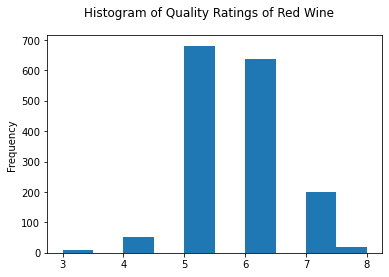

In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

#Importing data from source
red_data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=';')
white_data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=';')

# Showing the shapes of each dataset
print('This is the shape of red wine data: %s' % (red_data.shape,))
print('This is the shape of white wine data: %s \n' % (white_data.shape,))

#Counting number of empty values
print('This is a count of each features empty values')
print(red_data.isnull().sum())

#Showing distribution of red wine quality
red_hist = red_data['quality'].plot(kind='hist',subplots=True,sharex=True,sharey=True, title='Histogram of Quality Ratings of Red Wine')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000226F53D41C0>],
      dtype=object)

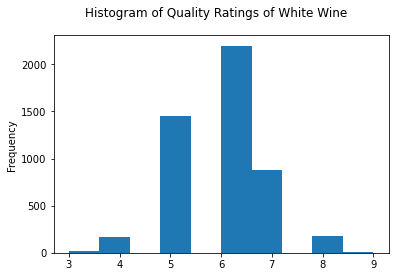

In [2]:
#Showing distribution of white wine quality
white_data['quality'].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Histogram of Quality Ratings of White Wine')
set_xlabel("Occurennces")

## Description of what was found during EDA
As you can see above, there are a lot of 5 and 6-level quality of Red Wines, and a lot of 6 and 7-level quality of White Wines. As you will see further along, this imbalance can create a challenge when building a model predicting quality. 

In [ ]:
## I won't run this for you, as you don't want a scrapbook, but this is what I used to draw the following conclusions on red wine
for col in red_data.columns:
    plot = sns.relplot(data=red_data, x=col, y="quality", kind='scatter')

# First cut analysis of how each variable effects red wine quality based on scatterplots
#### fixed acidity
slight boomerang affect. at lower values, it improves quality, but then appears to have less of an affect
#### volatile acidity
negative relationship between volatile acididity and quality
#### citric acid
slightly positive relationship
#### residual sugar
doesn't appeear to be much of a relationship
#### chlorides
doesn't appeear to be much of a relationship
#### free sulfur dioxide
doesn't appeear to be much of a relationship
#### total sulfur dioxide
doesn't appeear to be much of a relationship
#### density
slight negative relationship
#### pH
doesn't appear to be much of a relationship
#### sulphates
slight positive relationship, but over 1, it doesn't appear to make much of a difference
#### alcohol
definite positive relationship

In [ ]:
## I won't run this for you, as you don't want a scrapbook, but this is what I used to draw the following conclusions on white wine
for col in white_data.columns:
    plot = sns.relplot(data=white_data, x=col, y="quality", kind='scatter')

# First cut analysis of how each variable effects white wine quality based on scatterplots
#### fixed acidity
a slight negative relationship
#### volatile acidity
doesn't appear to be much of a relationship. possibly a slight negative relationship
#### citric acid
doesn't appear to be much of a relationship
#### residual sugar
doesn't appear to be much of a relationhip
#### chlorides
doesn't appear to be much of a relationship
#### free sulfur dioxide
doesn't appear to be much of a relationship
#### total sulfur dioxide
doesn't appear to be much of a relationship
#### density
could be a slight negative relationship
#### pH
slight positive relationship
#### sulphates
slight boomerang affect
#### alcohol
positive relationship



If you are showing a plot make sure that there is a title, axes are labeled and you explained why you are showing me this plot (it's connection to the problem and solution).

If you are working with a supervised learning problem, talk about the target variable. It's distribution, class imbalance etc.

# Prepare Data

Because this dataset was very clean (no missing or invalid values), there was not much preparation required. Once it was downloaded, I could begin EDA.

# Modeling
I am performing Linear Regression, using scikitlearn

I am modeling the red and white wines separately, as I discovered during EDA, the features affect their quality raitng differently.

The quality feature will be what the model is focusing on; determining which features (and how) contribute to quality of wine.

The initial model that I tried used all of the data. As seen below, that did not result in a very predictive model (an R-squared value of < 0.3 for both red and white wines.


## Initial Red Wine Quality Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = red_data.drop(columns = ['quality'])
y = red_data['quality'] #is is what I'm predicting
           
#ran the model,iterating and removing values that have a p value of >0.05
X= X.drop(columns=['fixed acidity', 'citric acid', 'density', 'residual sugar', 'free sulfur dioxide'])
    
scale_col = ['total sulfur dioxide', 'volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']
scaler = StandardScaler()
X[scale_col] = scaler.fit_transform(X[scale_col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

##Perfoming linear regression here
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# OLS results
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     121.8
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          1.05e-121
Time:                        13:18:15   Log-Likelihood:                -1256.2
No. Observations:                1279   AIC:                             2526.
Df Residuals:                    1272   BIC:                             2563.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6557 

As you can see in the above model, the R-squared value only gets up to 0.365 for the red wine model, even after performing Recursive Feature Engineering.

## Initial White Wine Model

In [26]:
X = white_data.drop(columns = ['quality'])
y = white_data['quality'] #is is what I'm predicting

#ran the model,iterating and removing values that have a p value of >0.05
X= X.drop(columns=['citric acid',  'chlorides', 'total sulfur dioxide'])
    
scale_col = ['fixed acidity', 'free sulfur dioxide','residual sugar', 'density', 'volatile acidity','pH', 'sulphates', 'alcohol']
scaler = StandardScaler()
X[scale_col] = scaler.fit_transform(X[scale_col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

##Perfoming linear regression here
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# OLS results
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 06 Dec 2020   Prob (F-statistic):          7.33e-280
Time:                        13:24:12   Log-Likelihood:                -4420.9
No. Observations:                3918   AIC:                             8860.
Df Residuals:                    3909   BIC:                             8916.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.8731    

For the white wine model, the R-squared value for the white wine model only gets to 0.287. Again, not very good (only 28.7% of the values can be explained by the model. 

# Fine Tune

The approach I took to improve the r-squared value was to remove average values. I tried different methods, and this is what resulted in the highest r-squared values:

### Red Wine
Remove all samples that have quality scores of 5 and 6.

### White Wine
Remove all samples that have quality scores of 6.

The results are below


In [ ]:
##Removing average values
red_data_mid_removed = red_data[red_data['quality'] != 5]
red_data_mid_removed = red_data_mid_removed[red_data_mid_removed['quality'] != 6]

X = red_data_mid_removed.drop(columns = ['quality'])
y = red_data_mid_removed['quality'] #is is what I'm predicting
           
#ran the model,iterating and removing values that have a p value of >0.05
X= X.drop(columns=['citric acid', 'density', 'residual sugar', 'fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide'])

    
scale_col = ['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']
scaler = StandardScaler()
X[scale_col] = scaler.fit_transform(X[scale_col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

##Perfoming linear regression here
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

# OLS results

In [ ]:

# Present Your Solution
What are your results? Why?

You must connect this part to the original business problem.

How certain are you of your results?

What are some limitations of your work?

Compared to others' work in this field, how is your result? Above expectations? Why? Below expectations? Why?